In [2]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib.lines as lines
import ipywidgets as wdgts
#import control

In [11]:
kp = 100.0
ki = 0.0
kd = 0.0
sistema = signal.TransferFunction([1],[1,10,20])
# s = control.tf('s')
# ctrlPID = kp + ki/s + kd*s
fechado = signal.TransferFunction([kd,kp,ki],[1,10+kd,20+kp,ki])

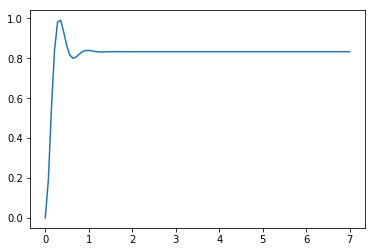

In [12]:
t,o = signal.step(fechado)
plt.plot(t,o)

$$(1+2\zeta s+s^2/\omega_0^2)^{-1}$$

In [32]:
def plotPID(kp,ki,kd):
    w = np.logspace(-3,3,200)
    f = plt.figure(figsize=(10, 6), dpi=80)
    ax1 = f.add_subplot(2,2,1)
    ax2 = f.add_subplot(2,2,3)
    ax3 = f.add_subplot(1,2,2)
    sistema = signal.TransferFunction([1],[1,10,20])
    w,magAberto,phaseAberto = signal.bode(sistema,w)
    fechado = signal.TransferFunction([kd,kp,ki],[1,10+kd,20+kp,ki])
    w,mag,phase = signal.bode(fechado,w)
    ax1.semilogx (w, mag, color="blue", lw=2)
    ax1.semilogx (w, magAberto, color="blue", lw=1)
    ax1.set_ylabel("Magnitude [dB]")
    ax2.semilogx (w, phaseAberto, color="red", lw=1)
    ax2.semilogx (w, phase, color="red", lw=2)
    ax2.set_ylabel("Fase [graus]")
    ax2.set_xlabel("Frequência [rad/s]")
    internalTimeArray,resStep = signal.step(fechado,T=timeArray)
    internalTimeArray,resStepAberto = signal.step(sistema,T=timeArray)
    #print(internalTimeArray)
    ax3.plot(internalTimeArray,resStep,color="blue",lw=2)
    ax3.plot(internalTimeArray,resStepAberto,color="blue",lw=1)
    ax3.plot(internalTimeArray,resStep)
    ax3.set_ylabel("Saída [V]")
    ax3.set_xlabel("Tempo [segundos]")
#plot2ndOrder(1)

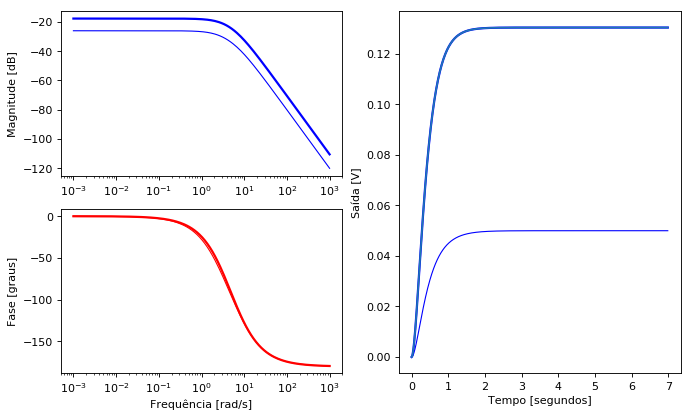

In [33]:
timeArray = np.arange(0,7,0.01)
plotPID(3,0,0)
#internalTimeArray,resStep = control.step_response(fechado,T=timeArray)
#plt.plot(internalTimeArray,resStep)

In [37]:
timeArray=np.arange(0,7,0.01)
wdgts.interact(plotPID,kp=wdgts.FloatSlider(min=0.0,max=400.0,value=1.0,description="Proporcional"),ki=wdgts.FloatSlider(min=0.0,max=500.0,value=0.0,description="Integral"),kd=wdgts.FloatSlider(min=0.0,max=100.0,value=0.0,description="Derivativo"))

interactive(children=(FloatSlider(value=1.0, description='Proporcional', max=400.0), FloatSlider(value=0.0, de…

<function __main__.plotPID(kp, ki, kd)>

In [ ]:
	15 33 37 38 47 54 